In [1]:
# here we import the necessary data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
# import the dataframe for the analysis
# this is a typical import of pandas csv files
# Efficiency wise this is not the most clever way to do!
# But since this is small data this is reasonably fast!
"""
Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation
"""
parkinson = pd.read_csv("../Data/More/parkinson_phonetic.csv")
parkinson_df = parkinson.set_index("name")
parkinson_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [4]:
parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, phon_R01_S01_1 to phon_R01_S50_6
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non

In [5]:
parkinson_df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


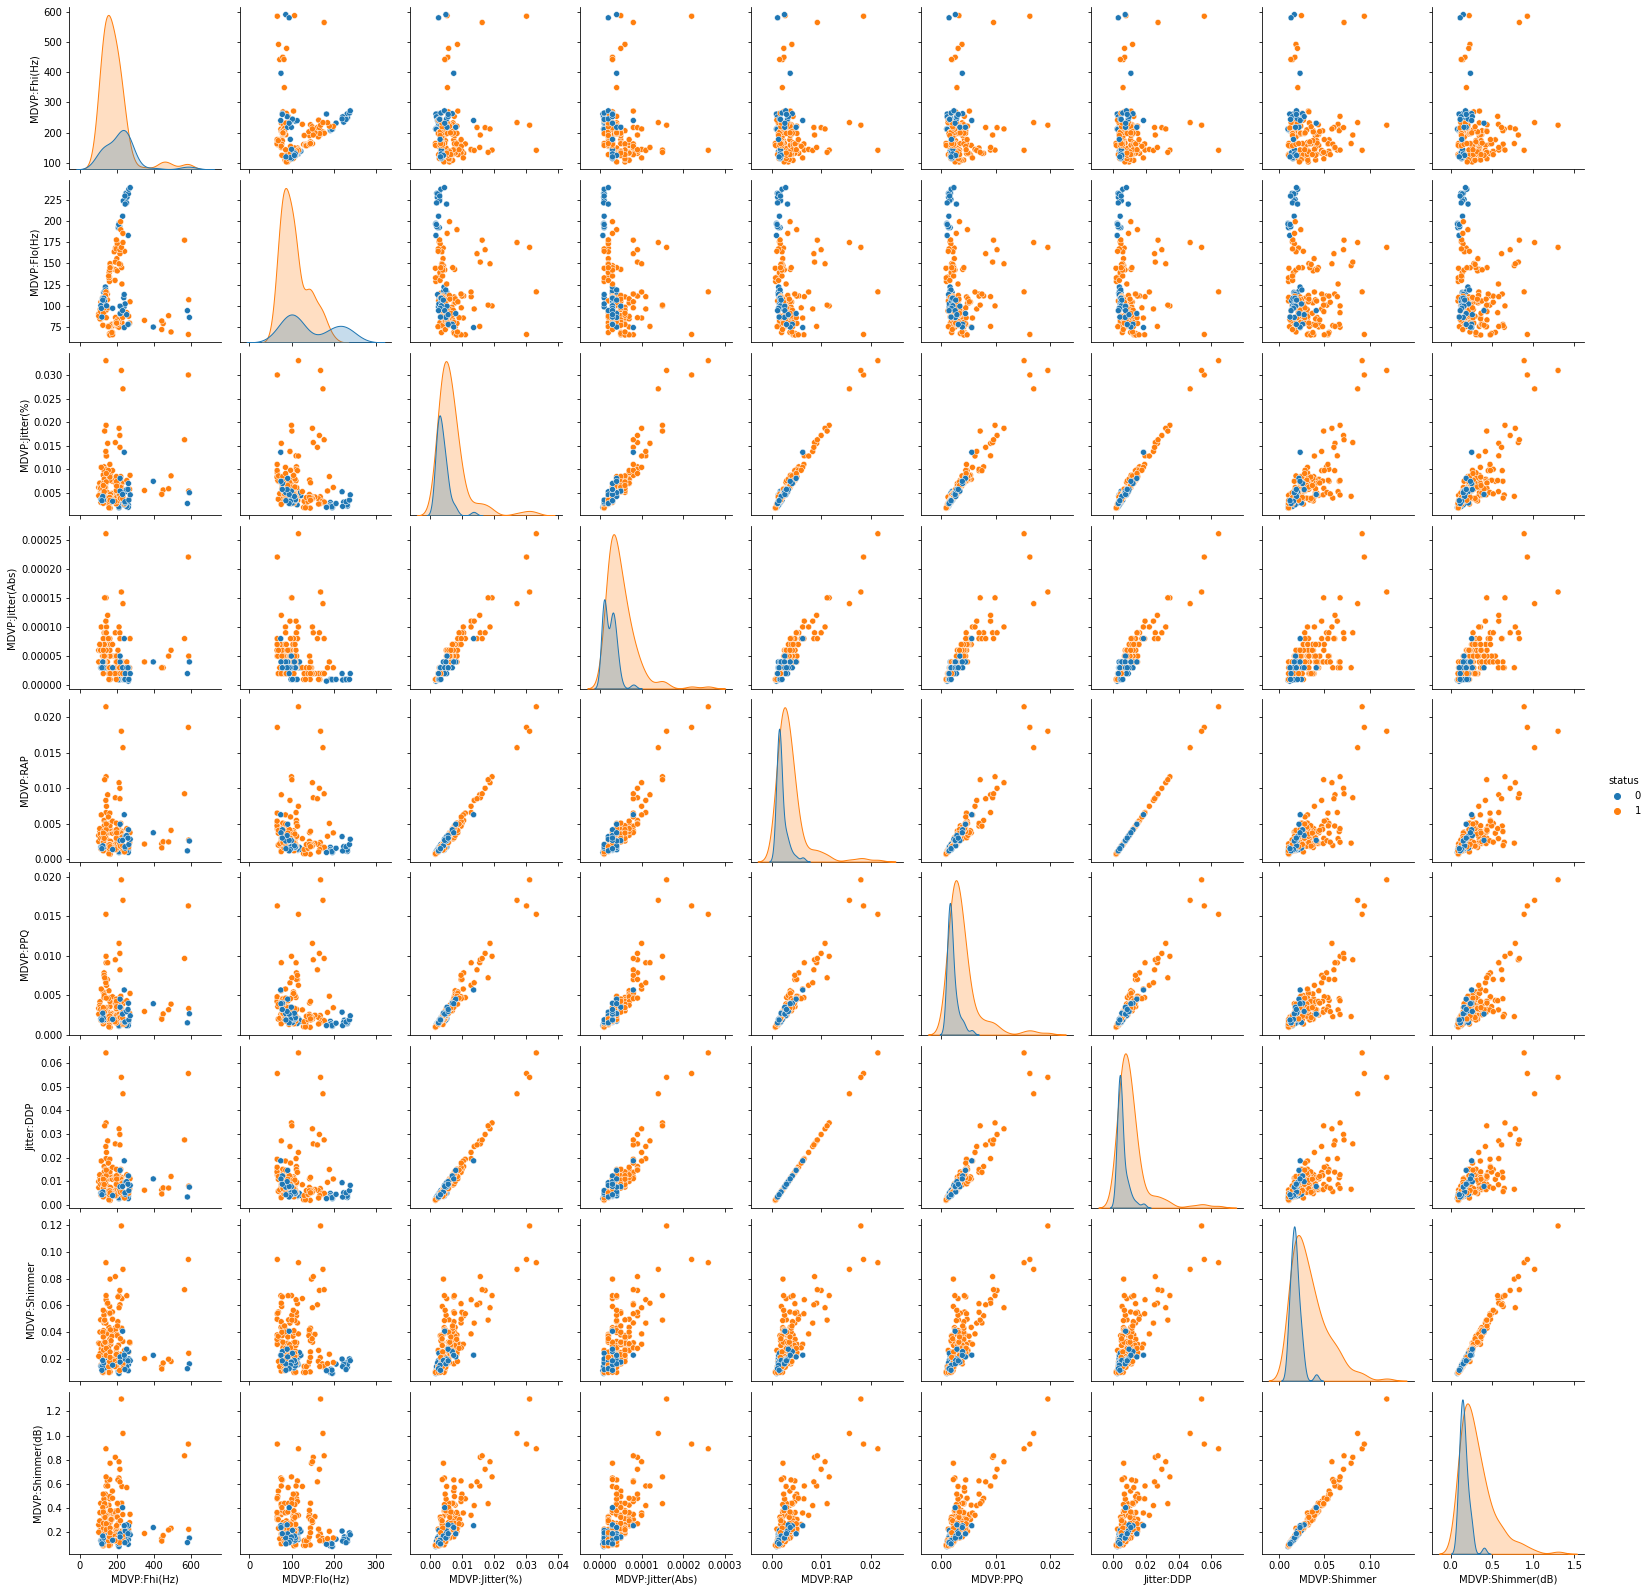

In [6]:
pairplot_hue = parkinson_df.iloc[:,1:10]
pairplot_hue["status"] = parkinson_df["status"]
sns.pairplot(data = pairplot_hue, hue = "status")

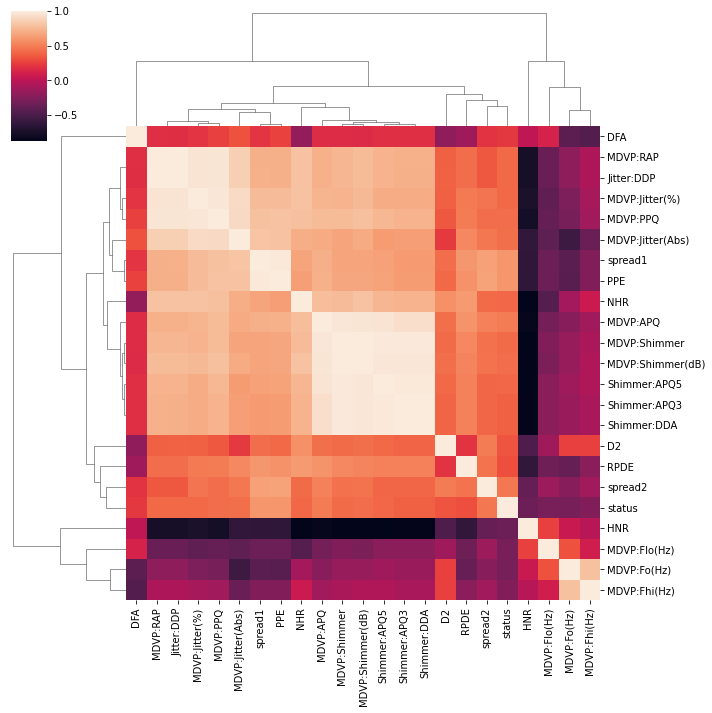

In [4]:
# retrieve the correlation coefficient between the variables
correlation_park = parkinson_df.corr(method="spearman")
sns.clustermap(correlation_park)

In [5]:
# Check the correlation of each variable
# This part will be explained
correlation_stacked = correlation_park.stack().reset_index()
print(correlation_stacked.sort_values(0, ascending = False))
correlation_stacked.columns = ["Var_1","Var_2","correlation"]
correlation_stacked = correlation_stacked[correlation_stacked["correlation"] != 1].sort_values("correlation", ascending = False)

              level_0           level_1         0
0         MDVP:Fo(Hz)       MDVP:Fo(Hz)  1.000000
288          MDVP:APQ          MDVP:APQ  1.000000
72     MDVP:Jitter(%)    MDVP:Jitter(%)  1.000000
96   MDVP:Jitter(Abs)  MDVP:Jitter(Abs)  1.000000
120          MDVP:RAP          MDVP:RAP  1.000000
..                ...               ...       ...
222  MDVP:Shimmer(dB)               HNR -0.865360
359               HNR               NHR -0.866022
337               NHR               HNR -0.866022
199      MDVP:Shimmer               HNR -0.866451
353               HNR      MDVP:Shimmer -0.866451

[529 rows x 3 columns]


In [6]:
# This part could be a question
def remove_double_inserted_data(data):
    """ This function can be used to retrieve the indeces of the
    doubled data from the unstacked correlation table
    """
    list_of_sets = [] # create a dummy list holding each set
    indeces = [] # create a list which should hold the final indeces
    for i,t in enumerate(data.values):
        if set(t) in list_of_sets:
            continue # what was the continue for?
        list_of_sets.append(set(t))
        indeces.append(i)
    return indeces

indexes = remove_double_inserted_data(correlation_stacked)
correlation_stacked = correlation_stacked.iloc[indexes]
correlation_stacked

,Var_1,Var_2,correlation
243,Shimmer:APQ3,Shimmer:DDA,0.999998
122,MDVP:RAP,Jitter:DDP,0.999980
215,MDVP:Shimmer(dB),MDVP:Shimmer,0.993185
194,MDVP:Shimmer,Shimmer:APQ3,0.988902
197,MDVP:Shimmer,Shimmer:DDA,0.988869
...,...,...,...
355,HNR,Shimmer:APQ3,-0.858254
268,Shimmer:APQ5,HNR,-0.864926
222,MDVP:Shimmer(dB),HNR,-0.865360
359,HNR,NHR,-0.866022


In [7]:
# In general this is not really necessary but we will still perform this
# Visualization is crucial to understand if everything works right and makes 
# sense
# should write it themself
def draw_correlation_scatter(data, dummies, length = 9, tail = False):
    """ 
    Function to draw the correlation scatter
    from the top 9 correlated variables
    data -> pandas unstacked and filtered dataframe holding correlation
    length -> variable to determine how many plots and variables should be considered
    tail -> if top correlated or anti-correlated should be used
    """
    count = 0
    plt.figure(figsize=(15, 12))

    data = data.tail(length) if tail else data.head(length)
    for i,t in zip(data["Var_1"].tolist(), data["Var_2"].tolist()):
        if count == length:
            break
        ax = plt.subplot(3, 3, count + 1)
        x_data = dummies[i].values
        y_data = dummies[t].values
        sns.regplot(x = x_data, y = y_data, ax = ax)
        count +=1
        plt.tight_layout()
        plt.xlabel(i)
        plt.ylabel(t)
        plt.suptitle("Correlation Matrix of a")
    plt.show()

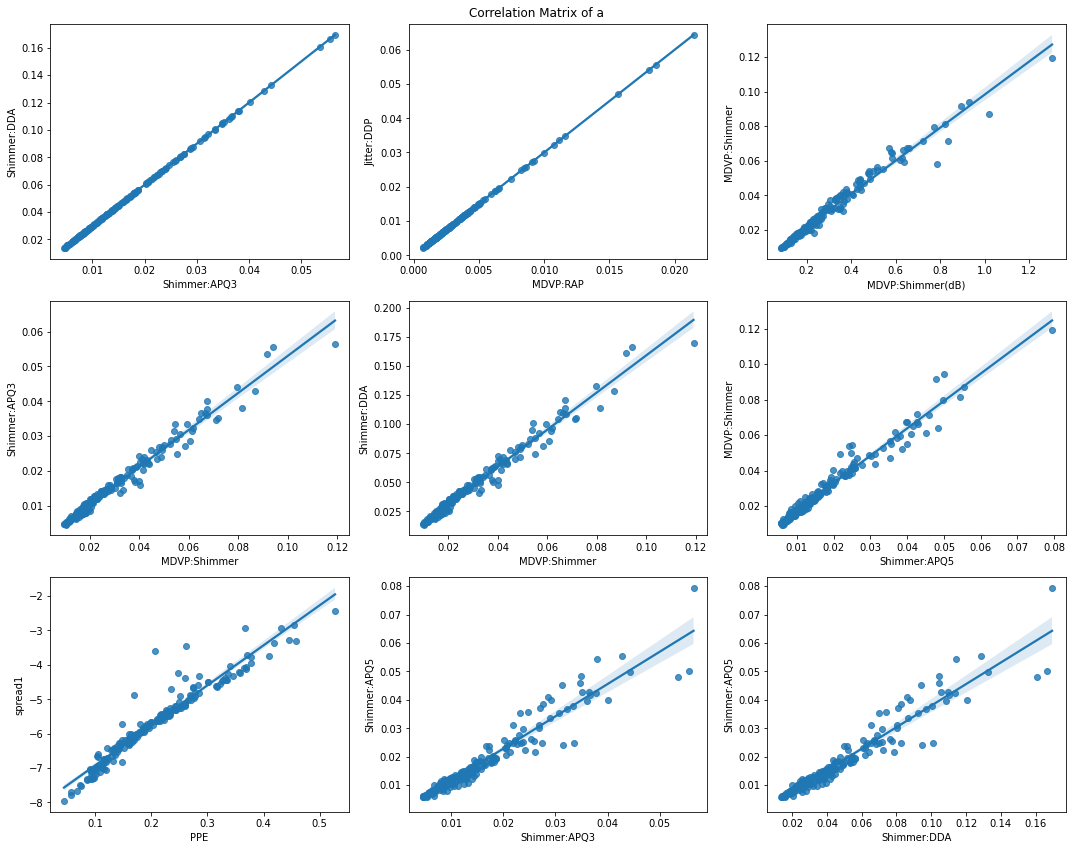

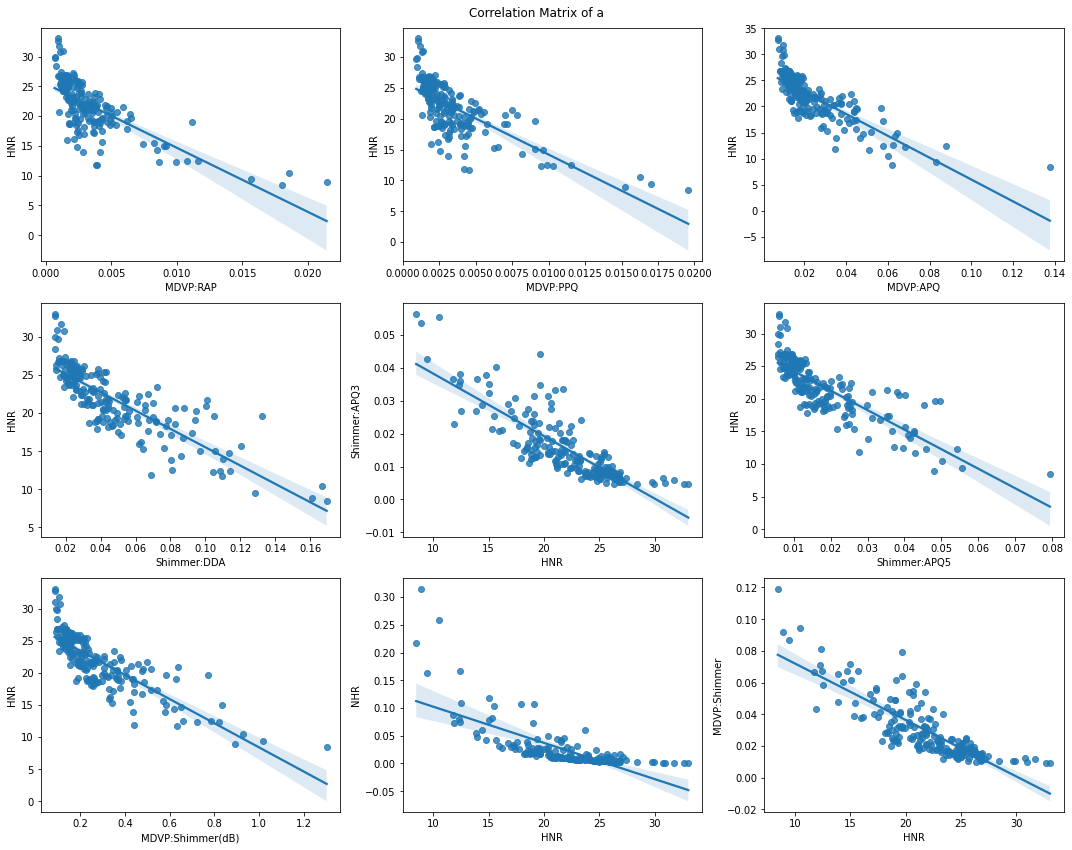

In [9]:
# Execute the functions and retrieve the correlated and anti-correlate genes (tail = True)
draw_correlation_scatter(correlation_stacked, parkinson_df)
draw_correlation_scatter(correlation_stacked,parkinson_df,tail = True)

In [40]:
# Now let us perform the PCA
# What do you think about this Plot?
# How to choose the # of components to use?
# What might be problematic about this implementation right now?
# What does the standard scaler do?
parkinson_pca = parkinson_df.copy()
components = parkinson_pca.shape[1]
scaled_data = preprocessing.StandardScaler().fit_transform(parkinson_pca.iloc[:,:-1]) # leave this out
pd.DataFrame(scaled_data, columns = parkinson_pca.iloc[:,:-1].columns, index = parkinson_pca.index).describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,3.529940e-17,-2.237526e-16,1.309494e-16,-3.586874e-17,1.024821e-16,-1.182103e-16,9.351494e-17,8.234154e-17,2.493732e-16,-1.374969e-16,...,-2.505119e-17,-1.673875e-16,3.586874e-17,8.770762e-16,-1.747890e-16,6.422213e-16,1.161678e-15,-1.246866e-16,-6.066372e-16,-2.163512e-17
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,...,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,-1.596162e+00,-1.040581e+00,-1.171366e+00,-9.389487e-01,-1.064103e+00,-8.872543e-01,-9.180440e-01,-8.873331e-01,-1.072340e+00,-1.014787e+00,...,-9.993055e-01,-1.097815e+00,-6.002051e-01,-3.045707e+00,-2.333888e+00,-2.605676e+00,-2.097268e+00,-2.647338e+00,-2.510472e+00,-1.802384e+00
25%,-8.879183e-01,-6.820590e-01,-7.379376e-01,-5.708520e-01,-6.898141e-01,-5.561906e-01,-5.764609e-01,-5.557071e-01,-7.020291e-01,-6.881025e-01,...,-6.508513e-01,-7.326182e-01,-4.693595e-01,-6.089102e-01,-7.449206e-01,-7.852617e-01,-7.041503e-01,-6.269844e-01,-7.404100e-01,-7.687420e-01
50%,-1.317379e-01,-2.331437e-01,-2.766579e-01,-2.647942e-01,-4.018994e-01,-2.724216e-01,-2.748504e-01,-2.736279e-01,-3.583019e-01,-3.151160e-01,...,-3.444009e-01,-2.841460e-01,-3.271036e-01,4.508553e-02,-2.490033e-02,7.527941e-02,-3.353960e-02,-9.166005e-02,-5.315145e-02,-1.390580e-01
75%,6.913210e-01,2.969710e-01,5.458200e-01,2.366858e-01,4.618447e-01,1.785683e-01,1.848331e-01,1.784870e-01,4.346898e-01,3.485429e-01,...,3.146448e-01,4.543110e-01,1.966835e-02,7.225273e-01,8.587132e-01,7.932500e-01,5.869042e-01,6.337615e-01,6.668912e-01,5.165137e-01
max,2.564598e+00,4.327631e+00,2.829908e+00,5.570985e+00,6.220139e+00,6.125892e+00,5.862742e+00,6.126923e+00,4.751617e+00,5.246243e+00,...,6.726438e+00,4.029746e+00,7.192738e+00,2.528321e+00,1.800007e+00,1.942048e+00,2.989093e+00,2.692370e+00,3.376831e+00,3.569059e+00


Text(0.5, 1.0, 'Parkinson PCA explained variance')

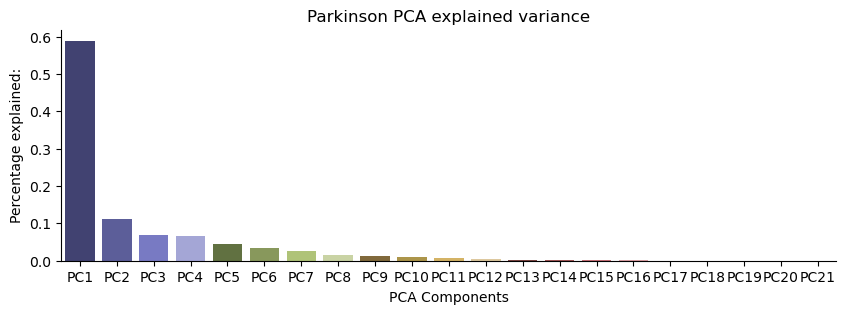

In [45]:
# Change the components to identify if there are changes nad how much explained variance should
# be in the data
# what might be the issue here?
pca = PCA(n_components= scaled_data.shape[1] -1)
pca_data = pca.fit_transform(scaled_data)
pca_explained = pca.explained_variance_ratio_
pca_components = [f"PC{i+1}" for i,t in enumerate(pca_explained)]
fig,ax = plt.subplots(figsize = (10,3))
sns.despine()
sns.barplot(x = pca_components, y = pca_explained, palette = "tab20b")
plt.xlabel("PCA Components")
plt.ylabel("Percentage explained:")
plt.title("Parkinson PCA explained variance")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

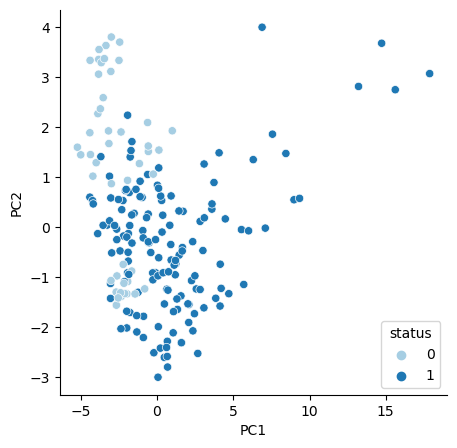

In [46]:
# Explain what is visible in this Plot
# Draw the first two Principle Componentes
pca_df = pd.DataFrame(pca_data[:,:2], columns = ["PC1","PC2"])
pca_df["status"] = parkinson_df["status"].tolist()
fig,ax = plt.subplots(figsize = (5,5))
sns.despine()
sns.scatterplot(data = pca_df, x = "PC1", y = "PC2", hue = "status", palette = "Paired")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
phon_R01_S33_2,110.453,127.611,105.554,0.00494,0.00004,0.00244,0.00315,0.00731,0.04128,0.379,...,0.03316,0.06688,0.02529,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
phon_R01_S31_1,138.190,203.522,83.340,0.00704,0.00005,0.00406,0.00398,0.01218,0.04479,0.441,...,0.03220,0.07761,0.01968,18.305,0.538016,0.741480,-5.418787,0.160267,2.090438,0.229892
phon_R01_S42_3,260.105,264.919,237.303,0.00339,0.00001,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
phon_R01_S21_2,180.978,200.125,155.495,0.00406,0.00002,0.00220,0.00244,0.00659,0.03852,0.331,...,0.02877,0.06321,0.02782,16.176,0.583574,0.727747,-5.657899,0.315903,3.098256,0.200423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S25_4,155.078,163.736,144.148,0.00168,0.00001,0.00068,0.00092,0.00204,0.01064,0.097,...,0.00928,0.01567,0.00233,29.746,0.334171,0.677930,-6.981201,0.184550,2.129924,0.106802
phon_R01_S04_3,152.845,163.305,75.836,0.00294,0.00002,0.00121,0.00149,0.00364,0.01828,0.158,...,0.01246,0.03191,0.00609,24.922,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
phon_R01_S22_2,148.272,164.989,142.299,0.00459,0.00003,0.00250,0.00256,0.00750,0.04190,0.383,...,0.03051,0.07150,0.01914,18.780,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489


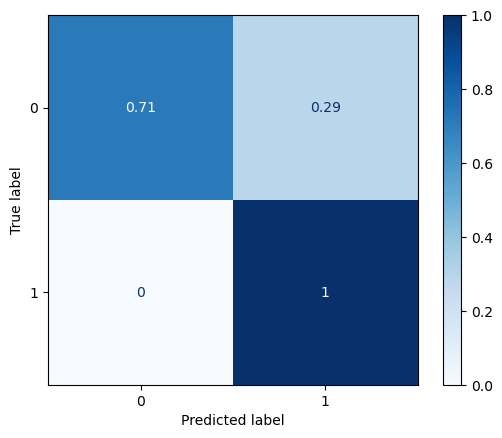

In [61]:
# model our data and using a random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(parkinson_pca.iloc[:,:-1], 
                                                    parkinson_pca["status"], 
                                                    test_size=0.20, 
                                                    random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=44)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
disp = plot_confusion_matrix(rf_model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
X_train

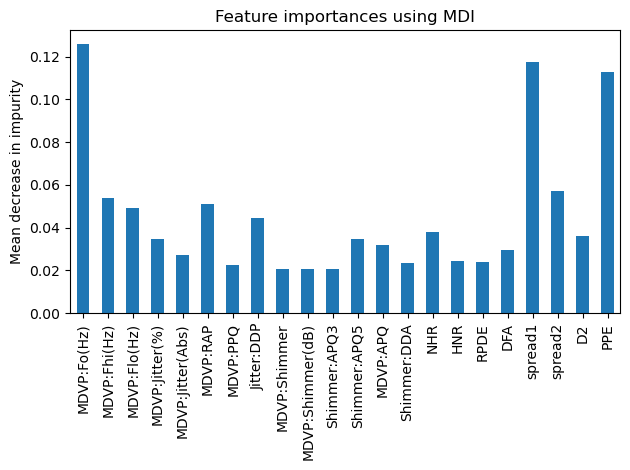

In [64]:
# Here we retrieve the feature importance which describes
# what data features are important to split the data in thre random forest
# and therefore also are hints which features can be used to distingush
importances = rf_model.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()